In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 

### Simple Moving Average
------
Simple Moving Average technique can be quite useful for both feature engineering and forecasting purposes. It can used for example to estimate mean and variance of stock returns which as we have seen before has volatility clustering implying that the distribution of stock returns (e.g its mean and variance) change over time. 

When modelling the financial data, we to estimate such quantities we have two options 

- We can choose to work with all sample we have at hand to derive mean / volatility of returns. 
- A second and more dynamical option is to derive moving average of these quantities over a desired rolling window. 

The second approach could be more useful from a model building perspective as the more recent values could be a better indicator of future ones than the values in the way past, e.g the overall sample average. The latter might give a good global look at the historical data but pretty much useless for forecasting/predictive purposes as the historical data does not grant the knowledge of future behavior. 


In [17]:
df = pd.read_csv('sp500_close.csv', index_col  = 0, parse_dates = True)

nvda_df = df[['NVDA']]

nvda_df.head()

,NVDA
2013-02-08,12.37
2013-02-09,NaN
2013-02-10,NaN
2013-02-11,12.51
2013-02-12,12.43


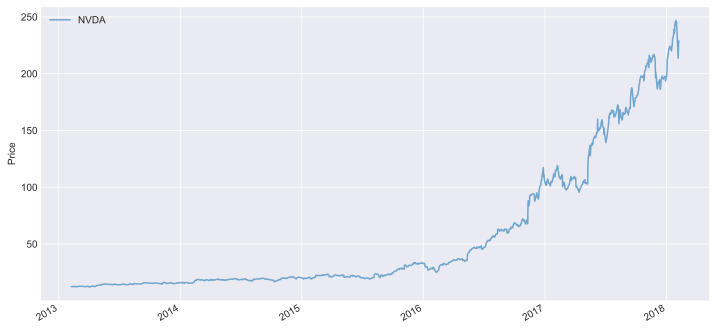

In [18]:
nvda_df = nvda_df.dropna()

fig, axes = plt.subplots(figsize = (12,6))

nvda_df.plot(ax = axes, alpha = 0.6)

axes.set_ylabel('Price')
axes.grid()

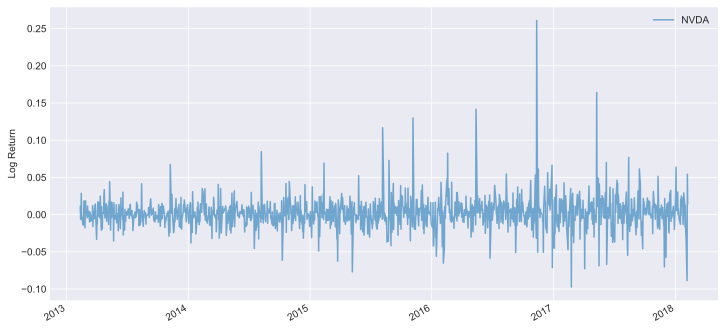

In [19]:
# log returns 


nvda_r_df = np.log(nvda_df.pct_change(1)+1)

fig, axes = plt.subplots(figsize = (12,6))

nvda_r_df.plot(ax = axes, alpha = 0.6)

axes.set_ylabel('Log Return')
axes.grid()

In [20]:
# simple moving average of window size = 10

nvda_df['SMA_10'] = nvda_df['NVDA'].rolling(window=10).mean()

nvda_df.head(11)

,NVDA,SMA_10
2013-02-08,12.370,NaN
2013-02-11,12.510,NaN
2013-02-12,12.430,NaN
2013-02-13,12.370,NaN
2013-02-14,12.730,NaN
2013-02-15,12.731,NaN
2013-02-19,12.555,NaN
2013-02-20,12.380,NaN
2013-02-21,12.290,NaN
2013-02-22,12.520,12.4886


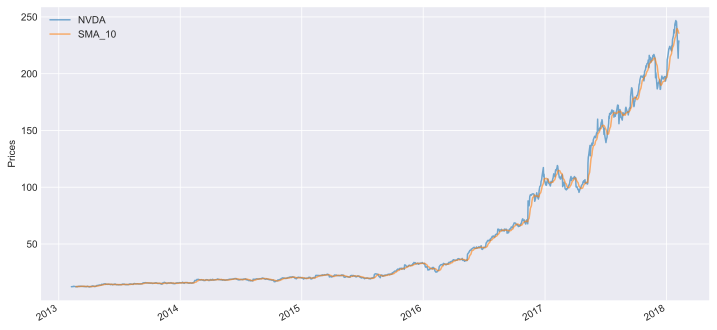

In [21]:
fig, axes = plt.subplots(figsize = (12,6))

nvda_df.plot(ax = axes, alpha = 0.6)

axes.set_ylabel('Prices')
axes.grid()

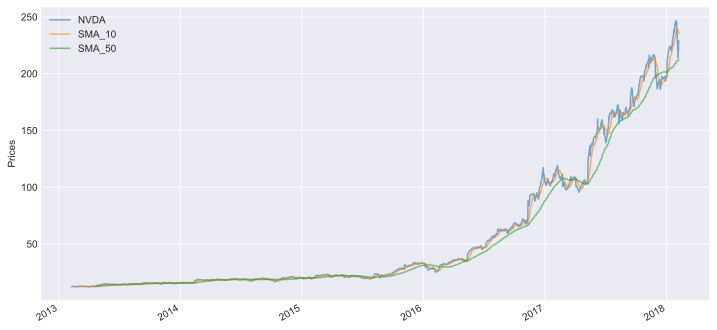

In [22]:
nvda_df['SMA_50'] = nvda_df['NVDA'].rolling(window=50).mean()

fig, axes = plt.subplots(figsize = (12,6))

nvda_df.plot(ax = axes, alpha = 0.6)

axes.set_ylabel('Prices')
axes.grid()

In [31]:
nvda_amd_df = df[['NVDA', 'AMD']]

nvda_amd_df = nvda_amd_df.dropna()

# covariance matrix of a rolling window of size 50 

cov_50 = nvda_amd_df.rolling(window = 50).cov()

cov_50.tail(6)

NVDA        AMD
2018-02-05 NVDA  352.480846  19.601026
           AMD    19.601026   1.144993
2018-02-06 NVDA  356.180135  19.667086
           AMD    19.667086   1.145909
2018-02-07 NVDA  361.452656  19.729409
           AMD    19.729409   1.146405

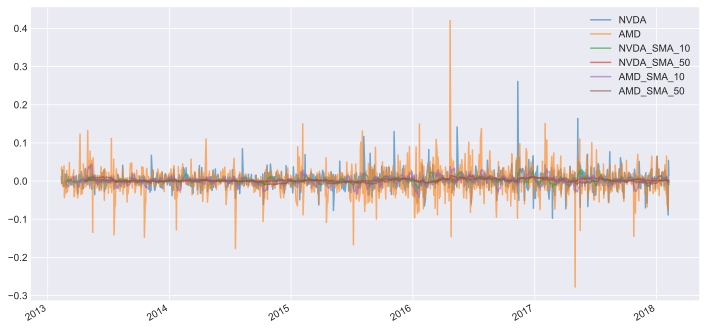

In [39]:
# log returns of amd and nvda 

nvda_amd_r_df = np.log(nvda_amd_df.pct_change(1) + 1)

# rolling mean of log returns 

for col in nvda_amd_r_df.columns: 
    
    nvda_amd_r_df[f"{col}_SMA_10"] = nvda_amd_r_df[col].rolling(10).mean()
    nvda_amd_r_df[f"{col}_SMA_50"] = nvda_amd_r_df[col].rolling(50).mean()
    
# Plot 

fig, axes = plt.subplots(figsize = (12,6))

nvda_amd_r_df.plot(ax = axes, alpha = 0.6)

axes.grid()

In [42]:
rolling_corr_10 = nvda_amd_r_df[['NVDA', 'AMD']].rolling(10).corr()

rolling_corr_10.tail(32)

NVDA       AMD
2018-01-17 NVDA  1.000000  0.659019
           AMD   0.659019  1.000000
2018-01-18 NVDA  1.000000  0.471069
           AMD   0.471069  1.000000
2018-01-19 NVDA  1.000000  0.542964
           AMD   0.542964  1.000000
2018-01-22 NVDA  1.000000  0.580953
           AMD   0.580953  1.000000
2018-01-23 NVDA  1.000000  0.513583
           AMD   0.513583  1.000000
2018-01-24 NVDA  1.000000  0.689147
           AMD   0.689147  1.000000
2018-01-25 NVDA  1.000000  0.618525
           AMD   0.618525  1.000000
2018-01-26 NVDA  1.000000  0.742104
           AMD   0.742104  1.000000
2018-01-29 NVDA  1.000000  0.714162
           AMD   0.714162  1.000000
2018-01-30 NVDA  1.000000  0.788090
           AMD   0.788090  1.000000
2018-01-31 NVDA  1.000000  0.667354
           AMD   0.667354  1.000000
2018-02-01 NVDA  1.000000  0.782286
           AMD   0.782286  1.000000
2018-02-02 NVDA  1.000000  0.871898
           AMD   0.871898  1.000000
2018-02-05 NVDA  1.000000  0.845330
           AMD   0.845330  1.000000
2018-02-06 NVDA  1.000000  0.768339
           AMD   0.768339  1.000000
2018-02-07 NVDA  1.000000  0.763527
           AMD   0.763527  1.000000

In [45]:
rolling_corr_50 = nvda_amd_r_df[['NVDA', 'AMD']].rolling(50).corr()

rolling_corr_50.tail(32)

NVDA       AMD
2018-01-17 NVDA  1.000000  0.664920
           AMD   0.664920  1.000000
2018-01-18 NVDA  1.000000  0.656580
           AMD   0.656580  1.000000
2018-01-19 NVDA  1.000000  0.692492
           AMD   0.692492  1.000000
2018-01-22 NVDA  1.000000  0.690689
           AMD   0.690689  1.000000
2018-01-23 NVDA  1.000000  0.691437
           AMD   0.691437  1.000000
2018-01-24 NVDA  1.000000  0.692149
           AMD   0.692149  1.000000
2018-01-25 NVDA  1.000000  0.702467
           AMD   0.702467  1.000000
2018-01-26 NVDA  1.000000  0.710066
           AMD   0.710066  1.000000
2018-01-29 NVDA  1.000000  0.712220
           AMD   0.712220  1.000000
2018-01-30 NVDA  1.000000  0.720109
           AMD   0.720109  1.000000
2018-01-31 NVDA  1.000000  0.701697
           AMD   0.701697  1.000000
2018-02-01 NVDA  1.000000  0.712516
           AMD   0.712516  1.000000
2018-02-02 NVDA  1.000000  0.729969
           AMD   0.729969  1.000000
2018-02-05 NVDA  1.000000  0.763365
           AMD   0.763365  1.000000
2018-02-06 NVDA  1.000000  0.739489
           AMD   0.739489  1.000000
2018-02-07 NVDA  1.000000  0.736665
           AMD   0.736665  1.000000

Correlations towards to the end of dataset appear to be positive but changing over time! 

### Exponentially-Weighted Moving Average (EWMA)
------

- Also known as exponential smoothing/ and a kind of low-pass filter 
- Very applicable in machine learning, statistics, finance and signal processing. 

As compared to the simple moving average of a given window size, EWMA weigths recent values more as compared to values in the far past!

Arithmetic mean: 

$$ \bar{x} = \frac{1}{T} \sum_{t = 1}^{T} x_t$$

EWMA: is calculated in a sort of on the fly / online manner. The recurrance formula for the EWMA at time $t$ is given by 

$$ \bar{x}_t = \alpha x_t + (1-\alpha) \bar{x}_{t-1},\quad\quad 0\leq \alpha \leq 1 $$

Large $\alpha$ gives more weight to the more recent values as $\alpha \to 1$. On the contrary $\alpha \to 0$ gives more weight to the past values. 

For example in the extreme case of $\alpha = 1$, moving average is just a copy of the original time series and so is not an average at all. For $\alpha = 0$, EWMA is just the copy of the previous average!

Intuitively than larger $\alpha$ follow the recent samples more leading to a more jadded fluctuating series, where a small one leads to smoother time series, where the series follow the existing average much more closely. 

*Some Details*:

For lots of data calculating the arithmetic mean is problematic from a computational perspective. For an arithmetic mean up to time $t$: 

$$ \bar{x}_t = \frac{1}{t} \sum_{\tau = 1}^{t} x_\tau$$

this calculation will take $\mathcal{O}(t)$ amount of time. This calculation can be made $\mathcal{O}(1)$ in both space and time complexity no matter how much data you have! For this purpose, we can consider the arithmetic mean (sample mean) up to previous time step and use it to desribe the sample mean up to time $t$ as: 

$$ \bar{x}_t  = \frac{1}{t} \left(x_t  + (t-1) \bar{x}_{t-1}\right)  = \left(1 - \frac{1}{t}\right)\bar{x}_{t-1} + \frac{x_t}{t}$$ 

Notice from this formula that as we have more samples, the weigth we give to the latest sample decreases, however the formula above is still an arithmetic mean so that actually each sample has the same weight for a fixed sample size of $t$. Instead of making the weight of the last sample change with sample size, we can make its weight constant $1/t \to \alpha$, which is simply give the EWMA!

Applying the recursive expression $t$ times: 

$$ \bar{x}_t =  (1-\alpha)^t \bar{x}_0 + \alpha \sum_{k = 0}^{t-1} (1-\alpha)^k x_{t-k} $$

so that the weights are exponentially decaying for samples that are more in the past!



